In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats
from scipy.special import gamma, factorial, jv
from scipy.optimize import curve_fit
%matplotlib inline

## Reading/Importing the MSD Data.

In [2]:
data = pd.read_excel('msd data.xlsx')

In [3]:
time = data['lag time (minutes)'].to_numpy()
msd = data['MSD'].to_numpy()

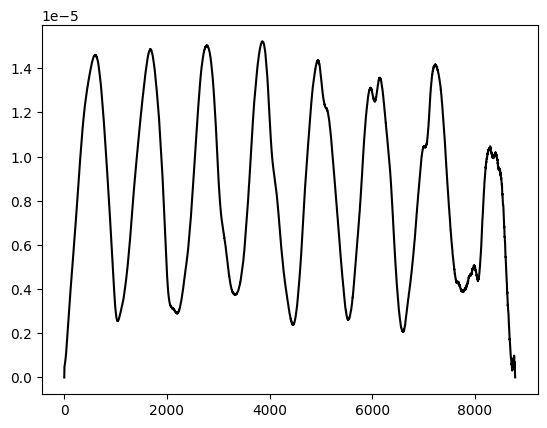

In [4]:
plt.plot(time, msd, "k-")

## Finding the cutoff point.

For my study, I am fitting the empirical MSD curves only up to the first dip in the curve. I will use the find_peaks function from the scipy package to detect the local minimas.

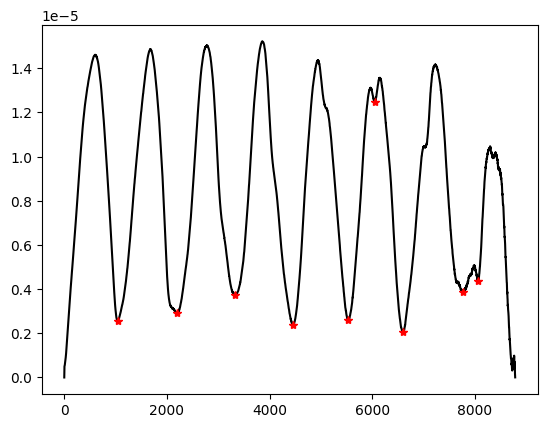

In [5]:
from scipy.signal import find_peaks

peaks = []

peaks,_ = find_peaks(msd*-1, width=25, prominence=0)
peak = peaks[0]
plt.plot(time, msd, "k-")
plt.plot(peaks*2, msd[peaks], "r*")
plt.show(block=True)

## Defining the Theoretical MSD Equation.

I used the following theoretical MSD equation,

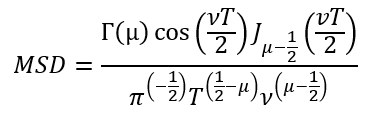

In [6]:
def theoMSD(T, N, mu, v):
    return N*((gamma(mu)*np.cos(v*T/2)*jv(mu-0.5, v*T/2))/((np.pi**(-0.5))*(T**(0.5-mu))*(v**(mu-0.5))))

We exclude the first point at t = 0, to avoid any divide by zero errors.

[1.44384672e-08 1.10008396e+00 2.96200806e-03]


Text(0, 0.5, 'MSD')

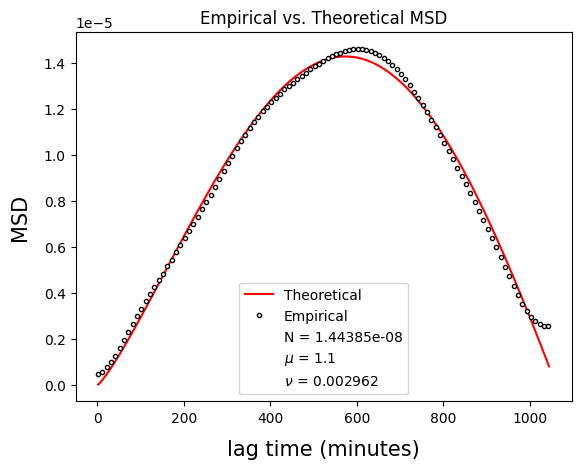

In [7]:
from scipy.optimize import curve_fit

initial = [0, 1, 0.001]

popt, pcov = curve_fit(theoMSD, time[1:peak], msd[1:peak], initial, maxfev=5000)
print(popt)

T = time[1:peak]
N = popt[0]
mu = popt[1]
v = popt[2]
    
plt.title('Empirical vs. Theoretical MSD')
line_1, = plt.plot(T, theoMSD(T, N, mu, v), 'r-', label='Theoretical')
line_2, = plt.plot(time[1:peak], msd[1:peak], 'k.', markerfacecolor='w', markevery=5, label='Empirical')
line_3, = plt.plot(T, theoMSD(T, N, mu, v), 'w-', alpha=0, label=r'N = %g' %popt[0])
line_4, = plt.plot(T, theoMSD(T, N, mu, v), 'w-', alpha=0, label=r'$\mu$ = %.4g' %popt[1])
line_5, = plt.plot(T, theoMSD(T, N, mu, v), 'w-', alpha=0, label=r'$\nu$ = %.4g' %popt[2])
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5]);
plt.xlabel('lag time (minutes)', fontsize = 15, labelpad = 10)
plt.ylabel('MSD', fontsize = 15, labelpad = 10)